In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [3]:
df.bedrooms.median()

4.0

In [4]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [5]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df.bedrooms

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [6]:
df

area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [8]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [9]:
reg.intercept_

221323.0018654043

In [10]:
## Price = m1*area + m2*bedrooms + m3*age + b
reg.predict([[3000,3,40]])

array([498408.25158031])

In [11]:
reg.predict([[2500,4,5]])

array([578876.03748933])

In [12]:
 112.0*2500 + 23388.88*4 + -3231.7179*5 + 221323.0018654043

578719.9323654043

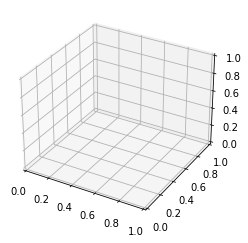

In [13]:
ax = plt.axes(projection='3d')

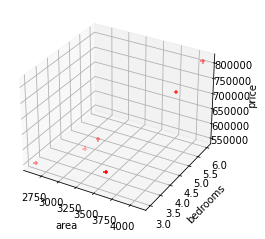

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('area')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
price = np.linspace(500000,810000,1000)
area = np.sin(price)
bedrooms = np.cos(price)
ax.scatter(df.area,df.bedrooms,df.price,color='red',marker='+')
plt.show()